In [21]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("./data/FIC.Full CSV.csv")

In [23]:
df

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,55,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,NO,...,0.5,2,0,7,3,0,BODY.PAIN,1,0,60
364,55,51-60,Male,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,2.0,2,3,7,3,1,STOMACH.BLEEDING,1,0,36
365,58,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,0.8,1,3,3,1,1,COUGH.BLEEDING,1,0,32
366,58,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,2.6,2,0,7,4,1,COUGH.BLEEDING,1,0,32


In [24]:
df.columns = df.columns.str.replace(" ","")

In [27]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
valores = ["Age",
"Age.Group",
"Gender",
"Sleep",
"Category",
"Depression",
"Hyperlipi",
"Smoking",
"Family.History",
"F.History",
"Diabetes",
"HTN",
"Allergies",
"BP",
"Thrombolysis",
"BGR",
"B.Urea",
"S.Cr",
"S.Sodium",
"S.Potassium",
"S.Chloride",
"C.P.K",
"CK.MB",
"ESR",
"WBC",
"RBC",
"Hemoglobin",
"P.C.V",
"M.C.V",
"M.C.H",
"M.C.H.C",
"PLATELET_COUNT",
"NEUTROPHIL",
"LYMPHO",
"MONOCYTE",
"EOSINO",
"CO",
"Diagnosis",
"Hypersensitivity",
"cp",
"trestbps",
"chol",
"fbs",
"restecg",
"thalach",
"exang",
"oldpeak",
"slope",
"ca",
"thal",
"num",
"SK",
"SK.React",
"Reaction",
"Mortality",
"Follow.Up"]
for i in df.columns:
    if df[i].dtype == 'category' or df[i].dtype == 'object':
        df[i] = label_encoder.fit_transform(df[i])

In [28]:
df

,Age,Age.Group,Gender,Locality,Maritalstatus,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,2,0,0,0,0,0,0,1,1,...,3.0,2,0,7,2,1,4,0,0,60
1,51,3,0,1,0,0,0,0,1,1,...,1.2,2,0,7,2,1,4,0,0,15
2,55,3,0,0,0,1,1,0,1,1,...,3.4,2,0,3,2,1,4,0,0,6
3,55,3,0,0,0,1,1,0,1,1,...,2.0,2,1,7,3,1,4,0,0,52
4,56,3,0,0,0,1,0,0,1,1,...,4.0,3,2,7,3,1,4,0,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,55,3,1,1,0,0,0,0,1,0,...,0.5,2,0,7,3,0,0,1,0,60
364,55,3,1,0,0,1,0,0,1,1,...,2.0,2,3,7,3,1,6,1,0,36
365,58,3,1,1,0,0,0,0,1,1,...,0.8,1,3,3,1,1,1,1,0,32
366,58,3,1,1,0,0,0,0,1,1,...,2.6,2,0,7,4,1,1,1,0,32


In [29]:
df_corr = df.corr()
df_corr

,Age,Age.Group,Gender,Locality,Maritalstatus,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
Age,1.000000,0.909621,-0.399270,-0.258597,0.038596,0.022408,-0.014876,0.068647,0.068382,-0.019244,...,0.103862,0.147343,0.438851,-0.261194,0.117005,-0.076990,0.143052,-0.288514,-0.099490,0.172255
Age.Group,0.909621,1.000000,-0.446004,-0.253317,0.011891,0.018114,0.052581,0.081777,0.079803,0.017770,...,0.150911,0.155589,0.407658,-0.225065,0.076460,-0.061914,0.147989,-0.332159,-0.082952,0.133261
Gender,-0.399270,-0.446004,1.000000,0.388843,0.048925,-0.027190,-0.033596,-0.165505,-0.087790,-0.151852,...,-0.096937,-0.139397,-0.205684,0.247361,-0.031986,-0.069477,-0.371774,0.913025,-0.251526,-0.020534
Locality,-0.258597,-0.253317,0.388843,1.000000,0.005802,-0.447561,-0.075968,-0.122574,-0.139635,-0.212936,...,-0.159979,-0.141499,-0.166992,0.048840,-0.012424,-0.097424,-0.304051,0.365628,-0.121436,-0.059228
Maritalstatus,0.038596,0.011891,0.048925,0.005802,1.000000,-0.047246,-0.010769,-0.030311,-0.124015,-0.090389,...,0.067156,-0.028271,0.028931,0.059399,0.055561,0.011672,-0.000344,0.052722,-0.047782,0.034532
Life.Style,0.022408,0.018114,-0.027190,-0.447561,-0.047246,1.000000,0.272650,-0.033396,0.079597,0.189014,...,0.181759,0.090202,0.055510,0.113101,0.092956,0.154334,0.013789,-0.002038,-0.029116,0.007864
Sleep,-0.014876,0.052581,-0.033596,-0.075968,-0.010769,0.272650,1.000000,0.102236,-0.009226,0.076132,...,0.111777,0.016754,0.024768,0.029879,-0.157211,0.103223,0.043660,0.005014,0.063387,-0.035936
Category,0.068647,0.081777,-0.165505,-0.122574,-0.030311,-0.033396,0.102236,1.000000,0.073580,0.094079,...,-0.079999,-0.130984,-0.018321,-0.009191,0.014850,0.043044,0.099794,-0.138265,0.130492,-0.082480
Depression,0.068382,0.079803,-0.087790,-0.139635,-0.124015,0.079597,-0.009226,0.073580,1.000000,0.682809,...,0.141400,0.099258,0.050559,-0.114464,0.045246,-0.028333,0.132051,-0.038613,0.053219,-0.151599
Hyperlipi,-0.019244,0.017770,-0.151852,-0.212936,-0.090389,0.189014,0.076132,0.094079,0.682809,1.000000,...,0.128285,0.069253,0.111390,-0.082654,0.029882,0.457527,0.263332,-0.139655,0.021971,-0.343462


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 60 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               368 non-null    int64  
 1   Age.Group         368 non-null    int32  
 2   Gender            368 non-null    int32  
 3   Locality          368 non-null    int32  
 4   Maritalstatus     368 non-null    int32  
 5   Life.Style        368 non-null    int32  
 6   Sleep             368 non-null    int32  
 7   Category          368 non-null    int32  
 8   Depression        368 non-null    int32  
 9   Hyperlipi         368 non-null    int32  
 10  Smoking           368 non-null    int32  
 11  Family.History    368 non-null    int32  
 12  F.History         368 non-null    int64  
 13  Diabetes          368 non-null    int64  
 14  HTN               368 non-null    int32  
 15  Allergies         368 non-null    int32  
 16  BP                368 non-null    float64
 1

In [31]:
df.describe().T.sort_values(by="mean", ascending=False).round(2)

,count,mean,std,min,25%,50%,75%,max
PLATELET_COUNT,368.0,248660.33,76707.56,20000.00,192000.00,237000.00,287000.00,459000.00
WBC,368.0,11181.28,3517.88,5800.00,7800.00,10650.00,13500.00,19590.00
C.P.K,368.0,553.89,957.61,52.00,135.00,188.00,390.00,4289.00
chol,368.0,248.94,50.13,131.00,212.00,249.00,283.00,409.00
BGR,368.0,219.99,139.34,60.00,117.00,164.00,291.00,563.00
thalach,368.0,140.92,22.99,71.00,125.00,144.00,158.00,195.00
S.Sodium,368.0,138.02,4.08,129.00,135.00,138.00,141.00,146.00
trestbps,368.0,132.74,18.19,100.00,120.00,130.00,142.00,200.00
BP,368.0,121.21,24.54,80.50,100.70,120.80,140.70,190.11
S.Chloride,368.0,103.82,4.80,90.00,100.00,104.00,107.00,112.00


In [43]:
features = ['Age.Group', 'Gender', 'Locality', 'Category', 'Smoking', 'Family.History', 'HTN', 'Others', 'CO', 'Diagnosis', 'cp', 'SK.React', 'PLATELET_COUNT', 'WBC', 'C.P.K', 'chol', 'BGR', 'thalach', 'trestbps', 'BP', 'M.C.V', 'CK.MB', 'Age', 'B.Urea', 'Follow.Up', 'M.C.H', 'RBC', 'NEUTROPHIL', 'EOSINO', 'num', 'oldpeak', 'S.Cr', 'ca', 'M.C.H.C', 'LYMPHO', 'MONOCYTE']

In [44]:
new_df = df[features]

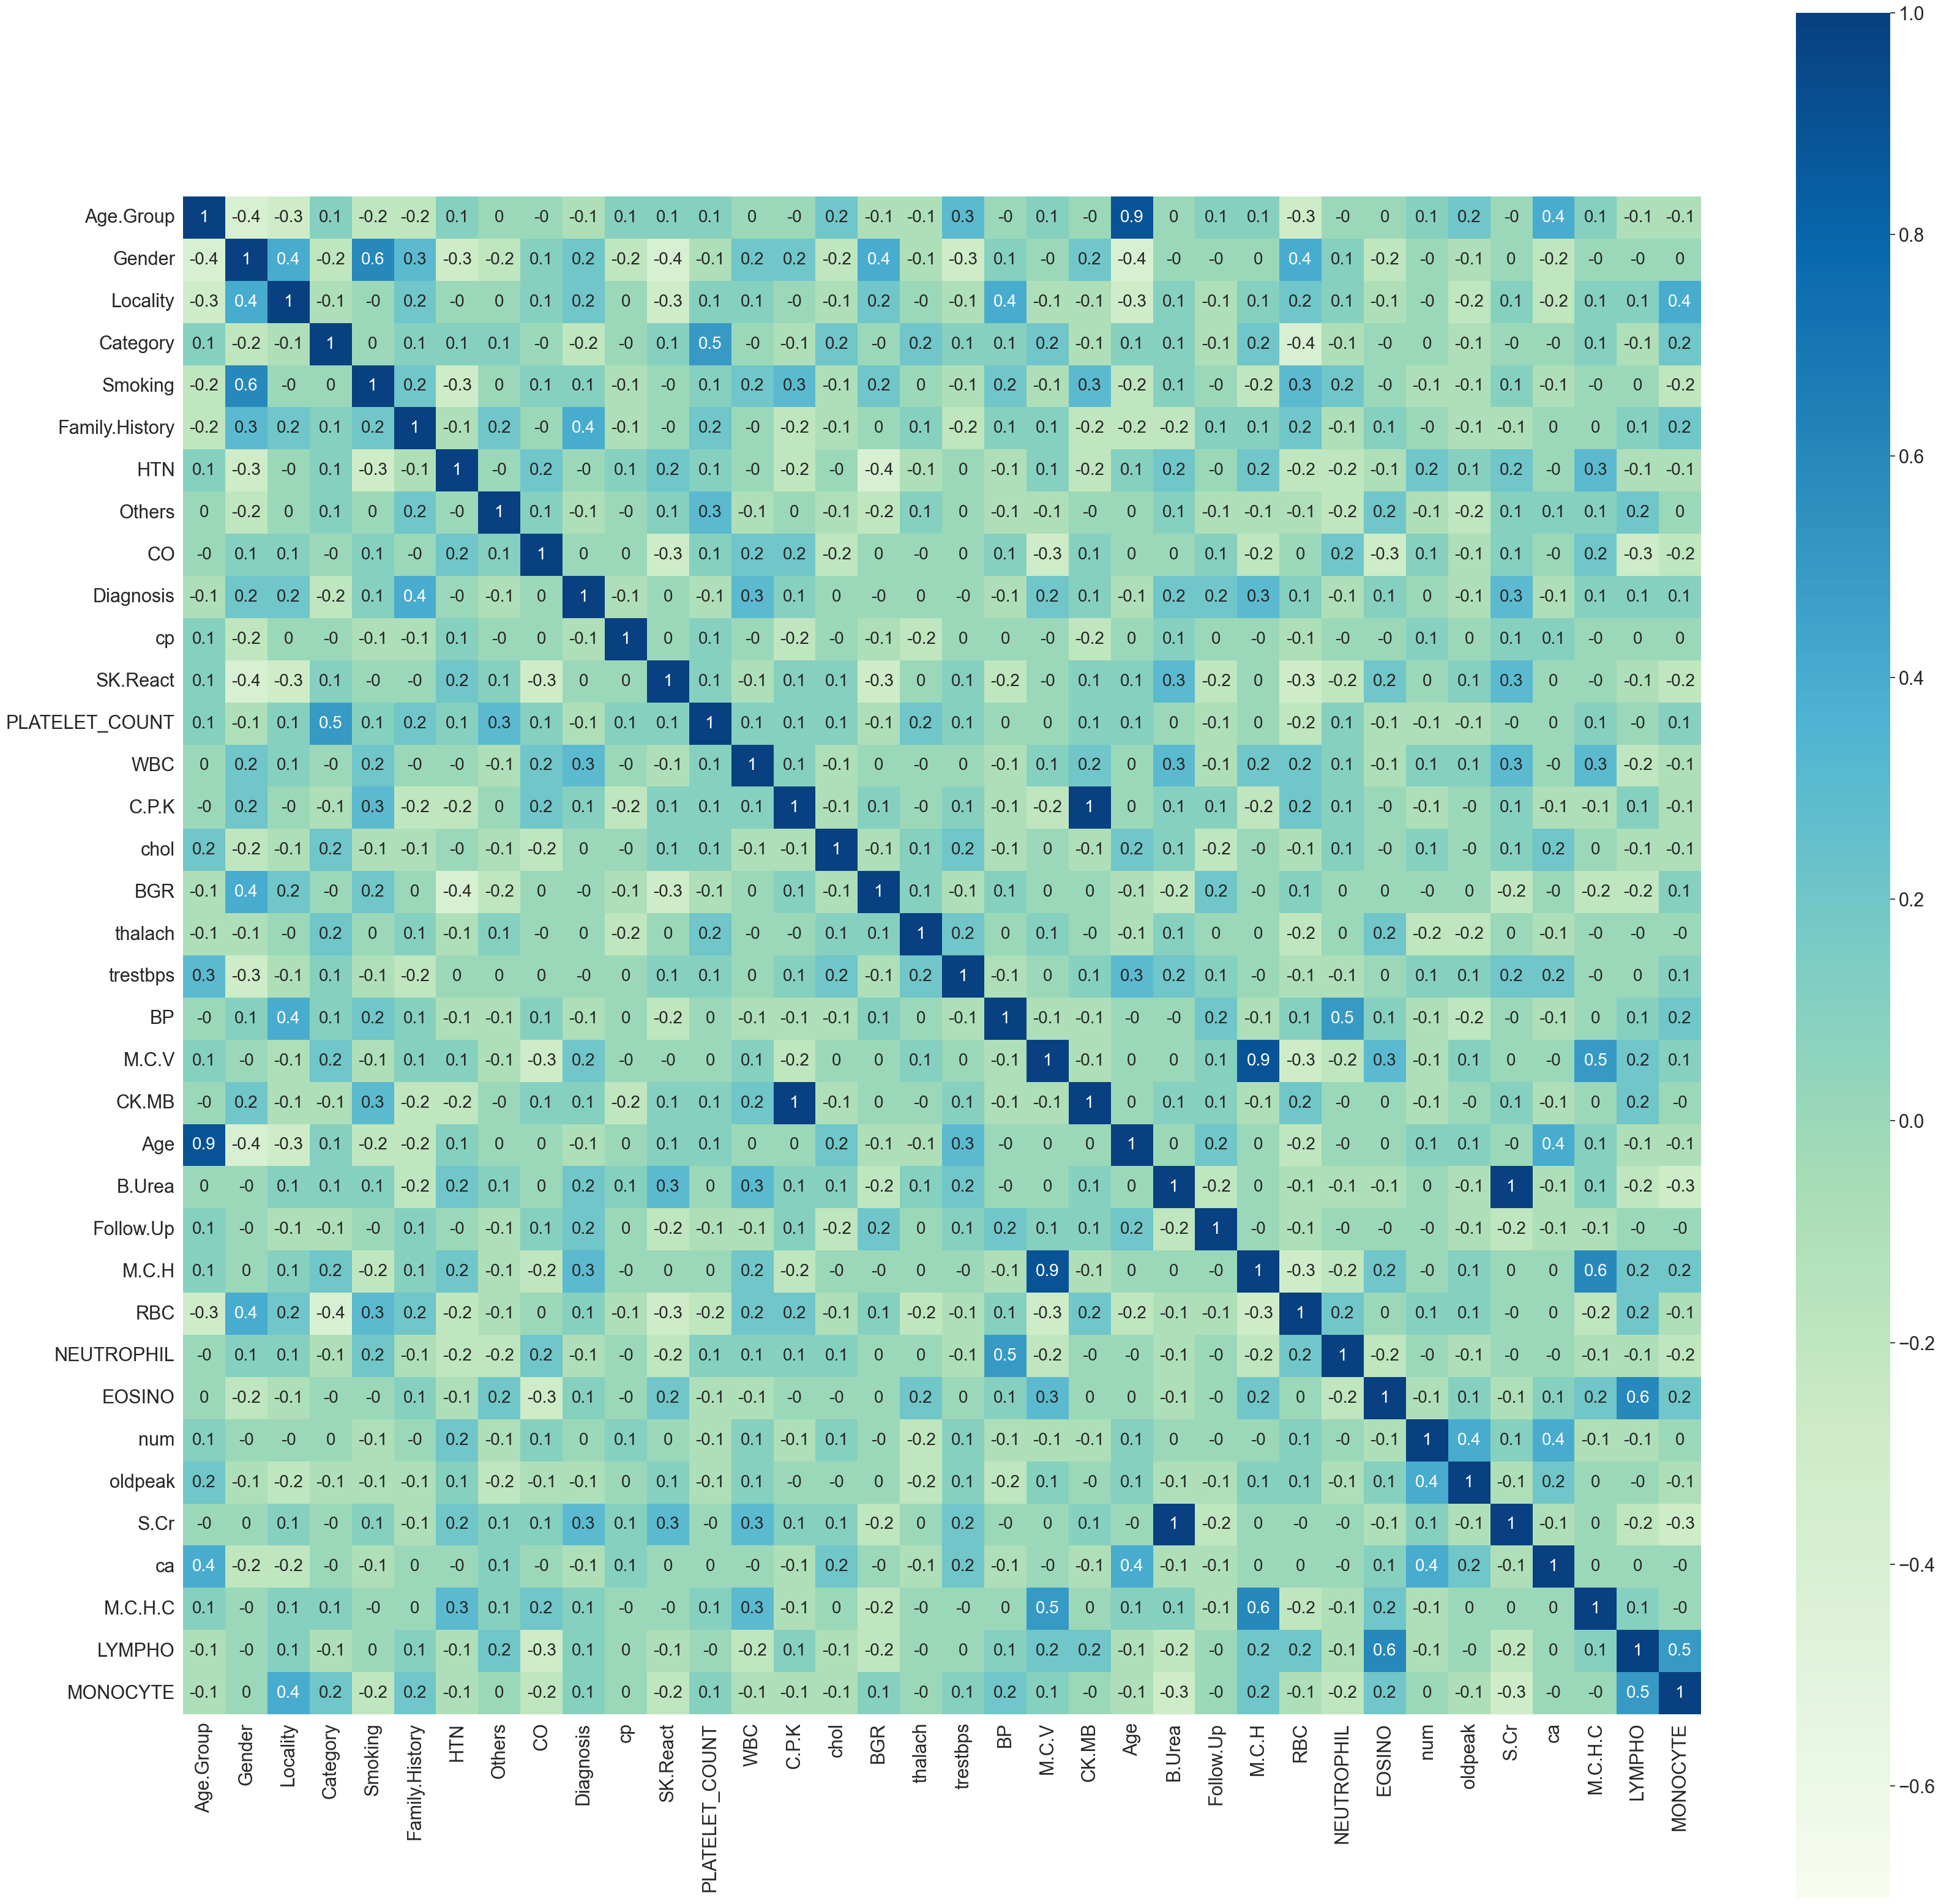

In [45]:
plt.figure(figsize=(40,40))
sns.heatmap(new_df.corr().round(1),vmin= df.corr().values.min(),vmax=1.0,cmap="GnBu",square = True,annot=True, annot_kws={"fontsize":20})
sns.set(font_scale=2)

In [46]:
X = df[features]
y = df['Mortality']

In [52]:
y.replace(to_replace = {0: "Alive",1: "Died"},inplace= True)
y

0      Alive
1      Alive
2      Alive
3      Alive
4      Alive
       ...  
363    Alive
364    Alive
365    Alive
366    Alive
367    Alive
Name: Mortality, Length: 368, dtype: object

In [53]:
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X,y,random_state=0)

In [55]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

In [56]:
from sklearn.linear_model import LogisticRegression
clf_logi_l2 = LogisticRegression(penalty='l2')
clf_logi_l2.fit(X_tn_std,y_tn)

LogisticRegression()

In [58]:
print(clf_logi_l2.coef_)
print(clf_logi_l2.intercept_)

[[-0.50092066 -1.18284995 -0.51409242  0.13611845  0.1388731  -1.12799951
   0.26630075  0.35688629  0.6723651   1.17664247 -0.32314254 -0.32654472
   0.70669533 -1.06915277 -1.21422981  0.36392046  0.37670827 -0.55574632
  -0.70337911 -0.01228895 -0.22613701  0.48851958 -0.09490208 -0.12595882
  -0.8002329   0.58047501  0.58435209 -0.5627869   0.34886702 -0.09562688
  -0.68200426  0.41033585 -0.26582931 -0.08099563  0.04567112 -0.07086203]]
[-2.14647148]


In [59]:
pred_logistic = clf_logi_l2.predict(X_te_std)
print(pred_logistic)

['Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Died'
 'Died' 'Alive' 'Died' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive'
 'Died' 'Died' 'Died' 'Alive' 'Alive' 'Alive' 'Died' 'Alive' 'Alive'
 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive'
 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Died'
 'Alive' 'Alive' 'Alive' 'Died' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive'
 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Died'
 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive'
 'Alive' 'Alive' 'Alive' 'Alive' 'Died' 'Alive' 'Alive' 'Died' 'Alive'
 'Alive' 'Died' 'Alive' 'Alive' 'Alive' 'Alive' 'Alive' 'Died' 'Alive'
 'Alive' 'Alive']


In [60]:
pred_proba = clf_logi_l2.predict_proba(X_te_std)
print(pred_proba)

[[9.83660556e-01 1.63394444e-02]
 [8.69821943e-01 1.30178057e-01]
 [8.66726406e-01 1.33273594e-01]
 [6.03986362e-01 3.96013638e-01]
 [8.38796514e-01 1.61203486e-01]
 [5.72349892e-01 4.27650108e-01]
 [9.82033588e-01 1.79664116e-02]
 [7.15262469e-01 2.84737531e-01]
 [2.28171987e-02 9.77182801e-01]
 [1.28869757e-01 8.71130243e-01]
 [9.97890153e-01 2.10984706e-03]
 [2.16709213e-01 7.83290787e-01]
 [8.23904507e-01 1.76095493e-01]
 [9.84909631e-01 1.50903695e-02]
 [6.34148331e-01 3.65851669e-01]
 [9.89727982e-01 1.02720181e-02]
 [8.96918303e-01 1.03081697e-01]
 [8.12826983e-01 1.87173017e-01]
 [4.49747647e-01 5.50252353e-01]
 [1.38208872e-01 8.61791128e-01]
 [2.54454171e-01 7.45545829e-01]
 [9.02458694e-01 9.75413061e-02]
 [9.90972186e-01 9.02781429e-03]
 [9.93507186e-01 6.49281361e-03]
 [1.08696355e-01 8.91303645e-01]
 [6.66233820e-01 3.33766180e-01]
 [9.86881006e-01 1.31189939e-02]
 [9.93951872e-01 6.04812799e-03]
 [8.81429989e-01 1.18570011e-01]
 [9.84221908e-01 1.57780920e-02]
 [9.517454

In [61]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te,pred_logistic)
print(accuracy)

0.8586956521739131


In [64]:
from sklearn.metrics import precision_score
precision = precision_score(y_te,pred_logistic, average = 'macro')
print(precision)

0.7994505494505495


In [65]:
from sklearn.metrics import recall_score
recall = recall_score(y_te,pred_logistic, average = 'macro')
print(recall)

0.7357606344628695


In [66]:
from sklearn.metrics import f1_score
f1 = f1_score(y_te,pred_logistic, average = 'macro')
print(f1)

0.7599839454144091


In [67]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_logistic)
print(conf_matrix)

[[69  4]
 [ 9 10]]


In [68]:
from sklearn.metrics import classification_report
class_report = classification_report(y_te,pred_logistic)
print(class_report)

              precision    recall  f1-score   support

       Alive       0.88      0.95      0.91        73
        Died       0.71      0.53      0.61        19

    accuracy                           0.86        92
   macro avg       0.80      0.74      0.76        92
weighted avg       0.85      0.86      0.85        92

